# Week 8 - Neural networks and deep learning

## 8.1 Fashion classification

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git


fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.2 TensorFlow and Keras

### Install and import libraries

In [3]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#install tensorflow
!conda install tensorflow -y #-y means yes, used only for notebooks to bypass check

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/linux-64/current_repodata.json HTTP/1.1" 304 0
| DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/linux-6

In [5]:
!pip install --upgrade numpy
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 10.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.58.0 requires numpy<1.26,>=1.21, but you have numpy 1.26.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 5.4 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 

In [6]:
#import packages
import tensorflow as tf
from tensorflow import keras

### Loading images with Keras

In [7]:
#loading images with keras
from tensorflow.keras.preprocessing.image import load_img

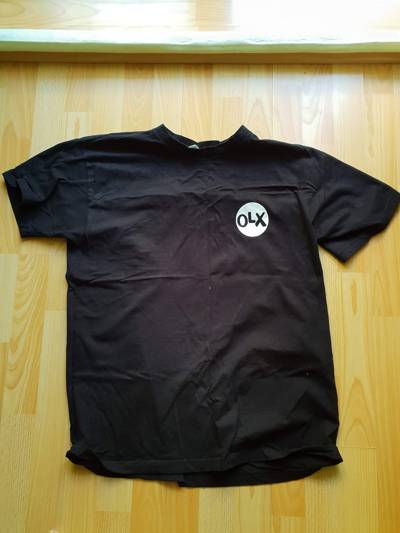

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [9]:
#image size must be standardized for the model, for example we can set it to 299x299
img = load_img(fullname, target_size=(299, 299))

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

Note above the (299, 299, 3) this corresponds to (heigh, width, # of channels)  
Channels refer to the RxGxB

## 8.3 Pre-trained convolutional neural networks  
Pre-trained models: https://keras.io/api/applications/  
- List of pretrained models trained with image nets  

Imagenet dataset: https://www.image-net.org/  

### Xception model

You can see what is required by going into the Xception model at the Keras pre-trained models link:  
```python
tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```

In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [13]:
#create model
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-18 09:42:31.348032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-18 09:42:31.348252: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


91884032/91884032 [==============================] - 9s 0us/step


The image expects an array of images

In [14]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [16]:
#note we must do the preprocessing since it is the preprocessing that was used when training the model
X = preprocess_input(X)

In [18]:
pred = model.predict(X)

1/1 [==============================] - 0s 409ms/step


In [19]:
pred.shape

(1, 1000)

Interpretation:  
There are 1000 classes of images. Each number in the array will be probability that this particular image belongs to that specific class.  
To make sense of this we must know what classes associate to what images.  

In [20]:
#decode predictions
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792446),
  ('n02916936', 'bulletproof_vest', 0.0396004),
  ('n04370456', 'sweatshirt', 0.035299607),
  ('n03710637', 'maillot', 0.01088415),
  ('n04525038', 'velvet', 0.0018057642)]]

Note that if you look at the actual imagenet classes there are none of just tshirt so this is actually quite accurate.  
While it is accurate with what it was given it is not useful.  
We need to use our own images to train it.  

## 8.4 Convolutional Neural Networks

## 8.5 Transfer Learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

Essentially we use the convolutional layers and the vector representation from a model becuase they are generic and hard to train. Then we create our own dense layers which are imagenet specific.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #this package helps read images

### Training dataset

In [23]:
#train
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #same preprocess_input as earlier

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [25]:
train_ds.class_indices #show class index, infered from folder structure

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [26]:
X, y = next(train_ds) #next gives 2 outputs the X and y

In [29]:
X.shape

(32, 150, 150, 3)

In [31]:
y[:5] #one hot encoded see the last column represents t-shirt

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Validation dataset

In [32]:
#validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #same preprocess_input as earlier

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False #we don't have to shuffle for validation
)

Found 341 images belonging to 10 classes.


### Model

In [50]:
#first we get the basemodel (convolutional layers) ie the "bottom" in keras terms
base_model = Xception( #get pretrained model
    weights='imagenet', #same as before, this is standard for this pretrained model
    include_top=False, #this leaves out the dense layers "top" where convolutional layers are "bottom"
    input_shape=(150, 150, 3)
)

base_model.trainable = False #this is because when we train the model we don't want to change the convolutional layers


In [51]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base) #this is mentioned below in turning 3d to 1d

outputs = keras.layers.Dense(10)(vectors) #10 due to number of classes we have

#wrap it in a keras model
model = keras.Model(inputs, outputs)

In [52]:
preds = model.predict(X)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 685ms/step


In [53]:
preds.shape

(32, 10)

If we were to just to use ouputs = bas ewe would get a 4 dimension base which we do not want.  
4 dimension base:
- 32: batch   

Remaining 3 dimension:
- 5
- 5
- 2048

This now needs to be turned into 1D vectors by slicing  
For example, slice each 5x5 (2048 total) piece and average it to get a single number to add to vector  
This creates a 2048 length vector  
This is done using the GlobalAveragePooling2D which then results in a preds.shape of a 2d object 

The preds.shape would be 32,2048 if the outputs were just the vectors.  
But, we apply dense layer (dimensionality 10 due to 10 classes) which changes this to 32,10 shape

### Train model

In [58]:
"""
there are many optimizers https://keras.io/api/optimizers/
they usually use gradient descent
Adam is currently recommended starting point for all models
"""
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 

"""
for multi class categorization: CategoricalCrossentropy
for log regression: BinaryCrossentropy
for linear regression: MeanSquaredErrorCrossentropy
"""
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
"""
in the dense layers the model takes inputs, generates outputs and then there is a softmax aka activation applied
from_logits = True means we dont apply activation and get row score
from_logits = False means we apply activation and get probabilities
"""

'\nin the dense layers the model takes inputs, generates outputs and then there is a softmax aka activation applied\nfrom_logits = True means we dont apply activation and get row score\nfrom_logits = False means we apply activation and get probabilities\n'

In [59]:
#compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy']) #this will show accuracy at each step

In [60]:
#fit model
"""
the model goes over the dataset batch by batch generally
if we specify an epoch then it will go over the dataset batch by batch that many times
"""
history = model.fit(train_ds, epochs=10, validation_data=val_ds) 

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 0.7356 - accuracy: 0.8064WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0c8d995580> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the 

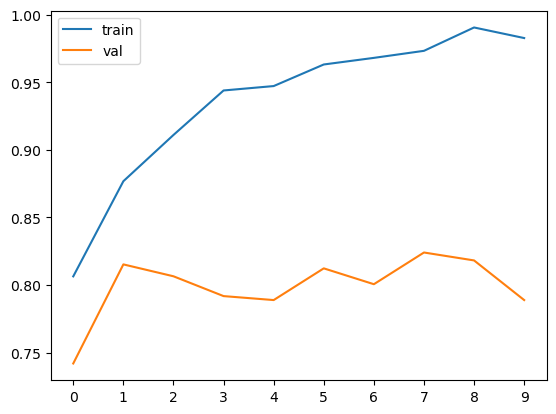

In [64]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xticks(np.arange(10))
plt.legend()

It looks like the model is clearly overfitting.  
To fix this we must tune the parameters.  
The most important is the learning rate.

## 8.6 Adjusting the Learning Rate

Imagine the learning rate as how fast you read books.  
If you have a high learning rate you read a lot of books very fast but you are likely skimming and don't remember a lot.  
If you have a low learning rate you may only read 1 book that year but you remember everything.  

### Compile the model code as a function:

In [65]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

### Tune learning rate

In [66]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 1.9887 - accuracy: 0.3188WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0d3c292e80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, s

### Assess learning rates via plot

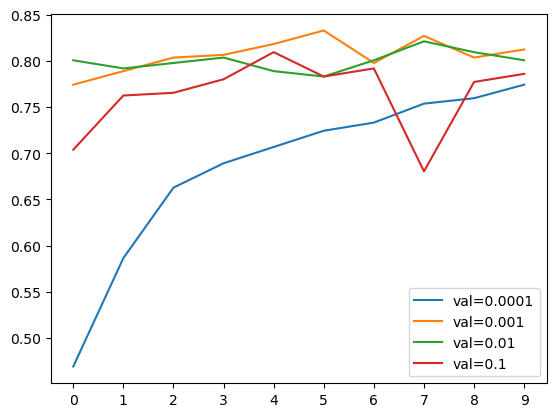

In [67]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [69]:
del scores[0.1]
del scores[0.0001]

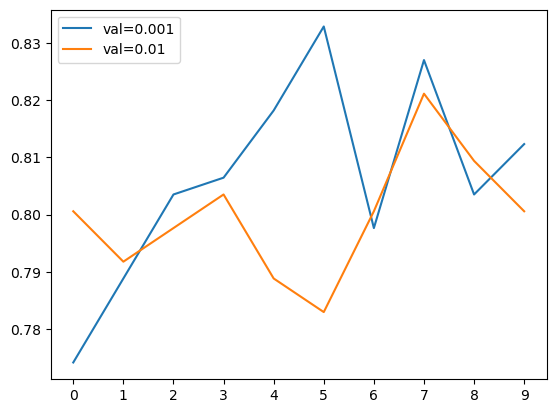

In [70]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

### Choose learning rate

In [71]:
learning_rate = 0.001

## 8.7 Checkpointing

Notice in the above plots some iterations have better results than later iterations.  
Implementing checkpointing allows us to keep the previous checkpoint if the following iteration is worse.  
This is called a callback.

In [75]:
#this is how we save the weights via a template
model.save_weights('model_v1.h5', save_format='h5') #h5 is binary format for keras models

In [76]:
"""
There are many callbacks available in keras we are using ModelCheckpoint
"""
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [77]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 1.1116 - accuracy: 0.6206WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0c9f8582c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the 

/home/tsimpson_unix/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


96/96 [==============================] - 34s 355ms/step - loss: 0.6346 - accuracy: 0.7836 - val_loss: 0.6282 - val_accuracy: 0.8006
Epoch 3/10
96/96 [==============================] - 32s 334ms/step - loss: 0.5166 - accuracy: 0.8233 - val_loss: 0.5899 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 34s 352ms/step - loss: 0.4311 - accuracy: 0.8608 - val_loss: 0.5575 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 34s 350ms/step - loss: 0.3740 - accuracy: 0.8840 - val_loss: 0.5545 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 32s 337ms/step - loss: 0.3259 - accuracy: 0.9071 - val_loss: 0.5327 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 31s 326ms/step - loss: 0.2876 - accuracy: 0.9224 - val_loss: 0.5159 - val_accuracy: 0.8328
Epoch 8/10
96/96 [==============================] - 34s 350ms/step - loss: 0.2605 - accuracy: 0.9325 - val_loss: 0.5209 - val_accuracy: 0.8328
Epoch 9/10

the initial model is saved as `model_v1.h5`  
consecutive trained models will be saved as `xception_v1_{n}_{a}.h5`  
- n = iteration ie 01, 02, 03 
- a = accuracy ie 0.700, 0.800, etc

## 8.8 Adding more layers

Note we had already added a dense layer earlier which is represented by the `input` and `output`  
Generally adding more layers helps with prediction accuracy  
Let us try to add another layer

In [79]:
def make_model(learning_rate=0.01, size_inner=100): #adding size_inner for new dense layer size
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) #adding inner layer using ReLu activation function

    outputs = keras.layers.Dense(10)(inner) #change input from vectors to inner
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

Note now in the dense layers the flow is from dense(100) to dense(10) instead of just to dense(10) then it hits the softmax/activation

There are many activation functions with some for the final layer and some for the intermediate layers. Some example popular activation functions are listed below.  
  
Activation functions (for output layers):  
- sigmoid
- softmax

Activation functions (for intermediate layers):  
- ReLu (rectified linear unit)

Now we need to train the size of the inner layer as this is a new hyperparameter

In [80]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 1.4792 - accuracy: 0.5091WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0c9ef918a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set t

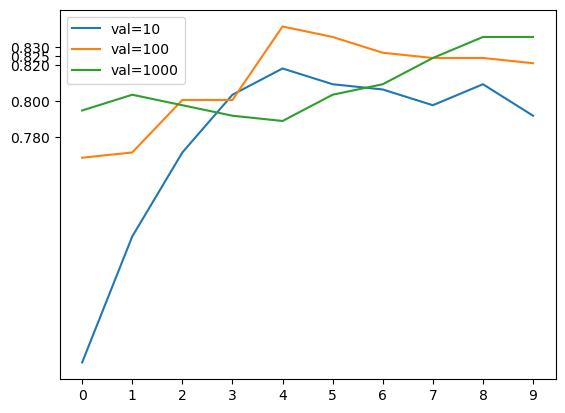

In [81]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

Dropout sort of works like blocking out portions of the image on each epoch.  
The reason for this is imagine there is a logo on a T-shirt the model was trained on. Then, the model sees that logo on a hat. It may think that it is a T-shirt (overfitting). This way we must block out specific portions on some epochs.  

Dropout is applied to a dense layer. It "freezes" a portion so the neuron does not get the information. On each iteration a specific part of the network is frozen.   

In [83]:
"""
droprate variable refers to how much (%) of the layer that is frozen on each iteration
ie droprate=0.5 means 50% of the layer is frozen on each iteration
the 50% is chosen randomly each time
"""

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) 
    drop = keras.layers.Dropout(droprate)(inner) #applying dropout to the inner layer
    
    outputs = keras.layers.Dense(10)(drop) #use the drop instead of the inner as input
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

Now we will train the various droprates  

Note that the epochs is raised from 10 so there is more time for dropout to work

In [84]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 0.9518 - accuracy: 0.6763WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0c9fd59620> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set 

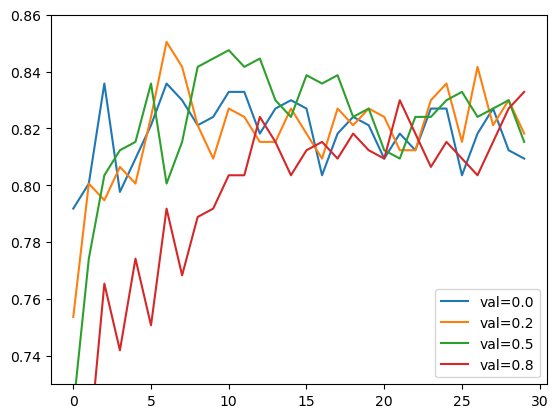

In [89]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.73, 0.86)
plt.legend()

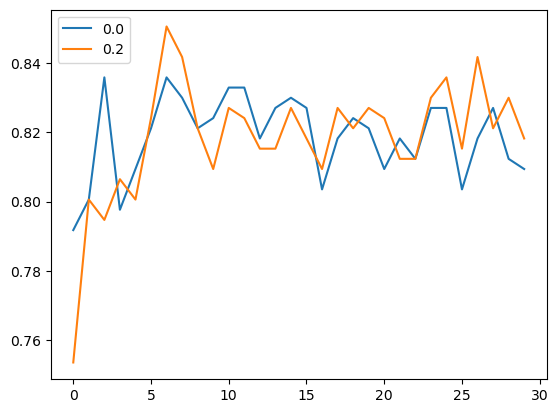

In [90]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

Very close to the 0 dropout which is good because we will avoid overfitting

Now that we have avoided some overfitting let us look at a way of generating more data for the model

## 8.10 Data augmentation

Previously we used epochs where the model would see the same images multiple times. To solve for overfitting in this scenario we implemented dropout.  
There is another way to address this problem.

Another way to solve this problem is to generate more images from each image we have so the model does not see the same image every time in the first place.  

Image transformations:
1. Flip - Horizontal and Vertical
2. Rotation (note you may lose some of image)
3. Shifting - Heigh and Width (note you may lose some of image)
4. Shear ie pulling from corners
5. Zoom - X and Y axis or on both
6. Brightness & Contrast
7. Black Patch

It is important to understand the variation in the dataset.  
For example are the objects always centered, can you afford loss from shifting/rotation?
 
Think of augmentation as a hyper parameter and tune it as such

To save time you can train on 10-20 epochs and if it's better then increase the epochs and see if it is better again

In [91]:
"""
There are many optional settings in ImageDataGenerator such as vertical_flip=True
"""
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=30, #this did not help in this dataset
    #width_shift_range=10.0, #this did not help in this dataset
    #height_shift_range=10.0, #this did not help in this dataset
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

#note we do not want to apply the preprocessing function to the validation set
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [92]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

#note we increase epochs again
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 1.3208 - accuracy: 0.5698WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0c8ffb6200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the 

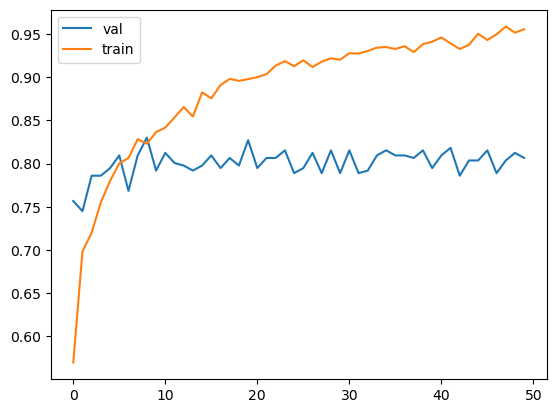

In [93]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

Now lets see the effects of training this model on larger images where augmentations may make more sense due to increased detail size

## 8.11 Training a larger model

Let us try 299x299

In [97]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [98]:
input_size = 299

In [99]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [100]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [101]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
96/96 [==============================] - ETA: 0s - loss: 1.0385 - accuracy: 0.6799WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0c8f4dc5e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the 

/home/tsimpson_unix/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


96/96 [==============================] - 177s 2s/step - loss: 1.0385 - accuracy: 0.6799 - val_loss: 0.5861 - val_accuracy: 0.7947
Epoch 2/50
96/96 [==============================] - 169s 2s/step - loss: 0.5381 - accuracy: 0.8250 - val_loss: 0.4820 - val_accuracy: 0.8387
Epoch 3/50
96/96 [==============================] - 165s 2s/step - loss: 0.4460 - accuracy: 0.8442 - val_loss: 0.4080 - val_accuracy: 0.8798
Epoch 4/50
96/96 [==============================] - 170s 2s/step - loss: 0.3951 - accuracy: 0.8634 - val_loss: 0.4006 - val_accuracy: 0.8622
Epoch 5/50
96/96 [==============================] - 164s 2s/step - loss: 0.3511 - accuracy: 0.8833 - val_loss: 0.3791 - val_accuracy: 0.8739
Epoch 6/50
96/96 [==============================] - 161s 2s/step - loss: 0.3361 - accuracy: 0.8846 - val_loss: 0.3727 - val_accuracy: 0.8798
Epoch 7/50
96/96 [==============================] - 156s 2s/step - loss: 0.3002 - accuracy: 0.9035 - val_loss: 0.3819 - val_accuracy: 0.8622
Epoch 8/50
96/96 [======

KeyboardInterrupt: 

Now lets apply this model to images

## 8.12 Using the model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

2023-11-21 17:13:28.082535: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 17:13:28.294021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 17:13:28.294085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 17:13:28.347421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 17:13:28.434221: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 17:13:28.435105: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [5]:
model = keras.models.load_model('xception_v4_1_10_0.891.h5')

In [6]:
model.evaluate(test_ds)

12/12 [==============================] - 20s 2s/step - loss: 0.2439 - accuracy: 0.9140


[0.24392792582511902, 0.9139785170555115]

In [7]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [8]:
img = load_img(path, target_size=(299, 299))

In [9]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [10]:
X = preprocess_input(X)

In [11]:
pred = model.predict(X)

1/1 [==============================] - 0s 443ms/step


In [12]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [13]:
dict(zip(classes, pred[0]))

{'dress': -2.868603,
 'hat': -2.3285286,
 'longsleeve': -1.4010653,
 'outwear': -0.52073354,
 'pants': 9.446256,
 'shirt': 0.104120925,
 'shoes': -4.208632,
 'shorts': 4.2227926,
 'skirt': -4.0242133,
 't-shirt': -2.4865274}